In [3]:
%pip install pandas-profiling --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x23af2884e00>)

In [7]:
%pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

In [9]:
medical_df = pd.read_csv('medical.csv')

In [10]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
%pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [17]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=["red"],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['blue', 'pink'], 
                   title='Annual Medical Charges w.r.t sex')
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['black', 'orange', 'purple', 'yellow'], 
                   title='Annual Medical Charges w.r.t region')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [24]:
px.histogram(medical_df, x='sex', color='region', title='children')

In [25]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [26]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [27]:
px.violin(medical_df, x='children', y='charges')

In [28]:
px.violin(medical_df, x='children', y='charges')

In [29]:
px.violin(medical_df,x='region', y='charges')

In [30]:
px.violin(medical_df,x='smoker', y='charges')

In [31]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [32]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [33]:
medical_df.charges.corr(medical_df.children)

0.06799822684790477

In [34]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [35]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984773

In [36]:
numeric_df = medical_df.select_dtypes(include=['number','float'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [37]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['black', 'orange', 'purple', 'yellow'], 
                   title='Annual Medical Charges w.r.t region')
fig.update_layout(bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

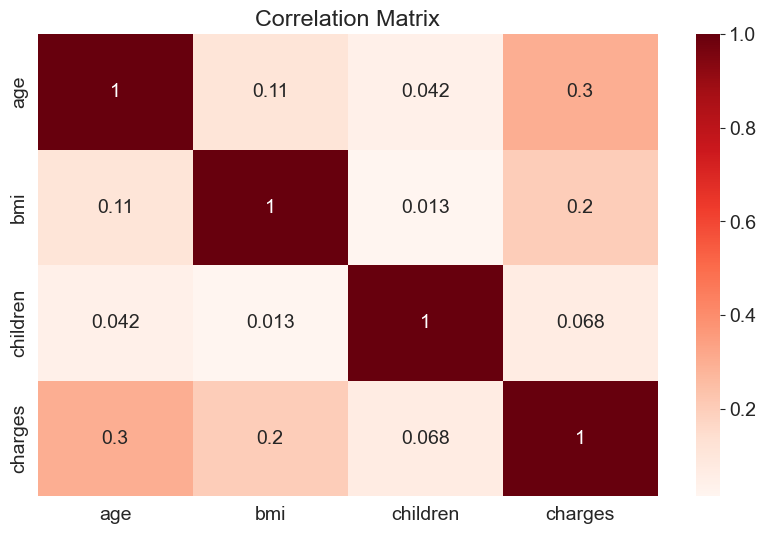

In [38]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [39]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

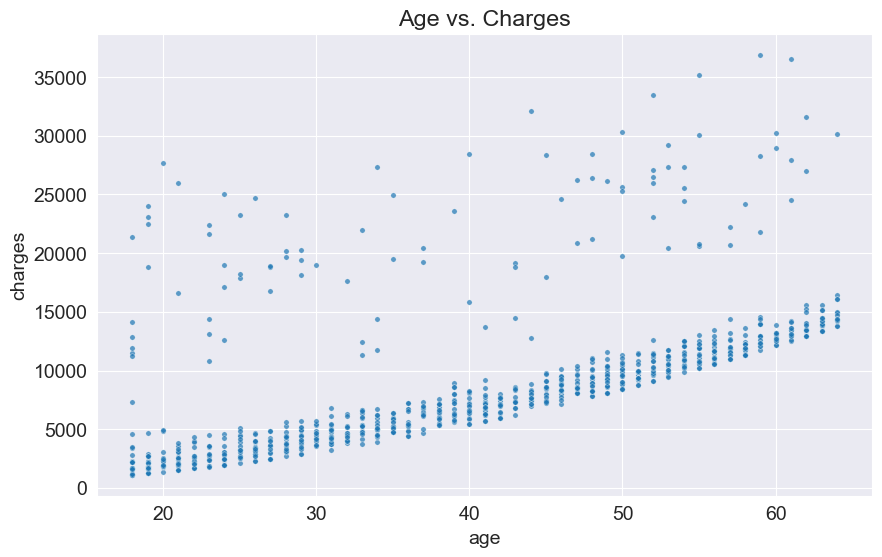

In [40]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [41]:
def estimate_charges(age, w, b):
    return w * age + b

In [42]:
w = 50
b = 100

In [43]:
estimate_charges(40,w,b)

2100

In [44]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

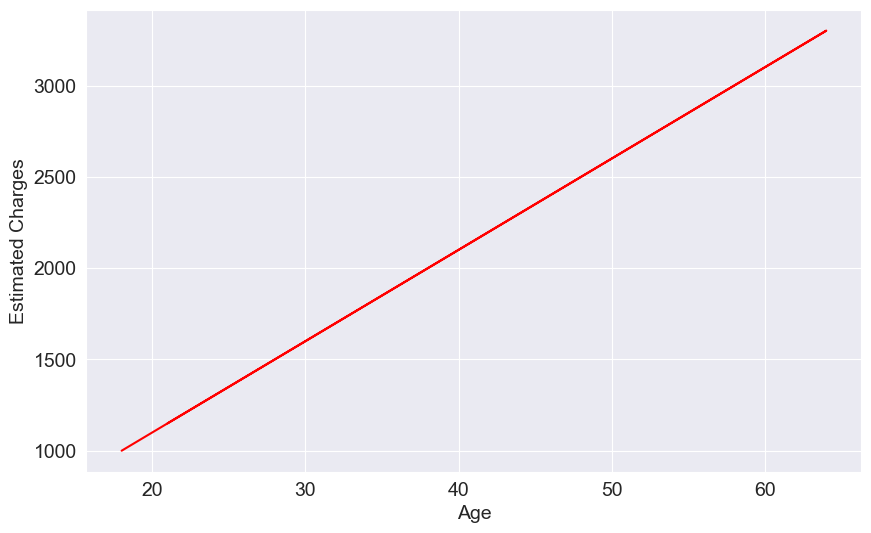

In [45]:
plt.plot(ages,estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

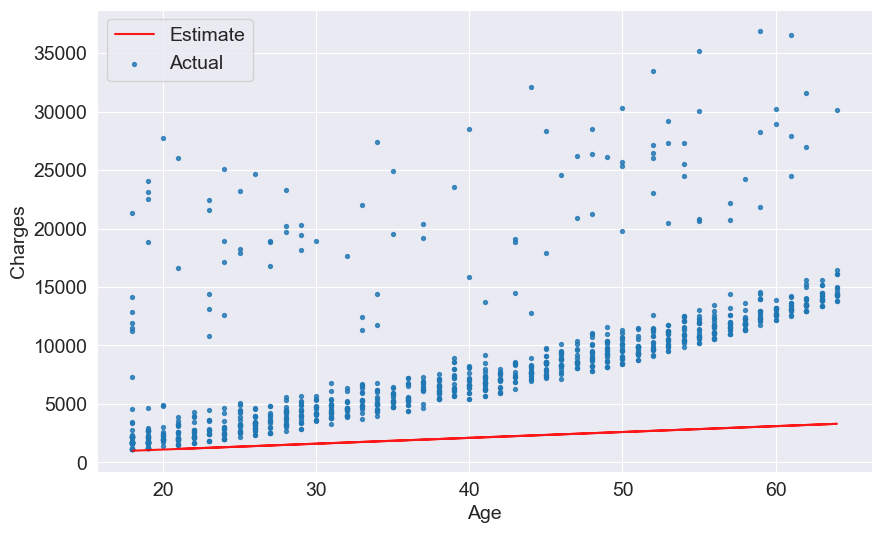

In [46]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [48]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

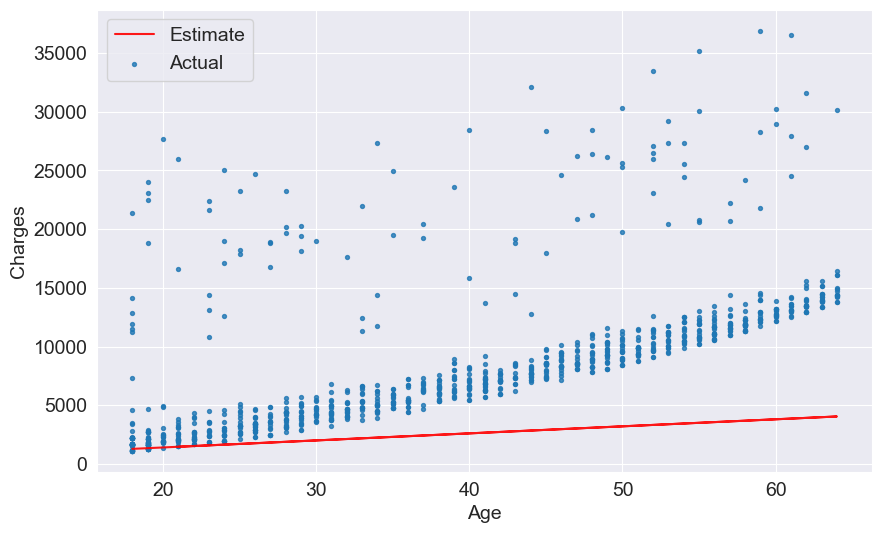

In [49]:
try_parameters(60,200)

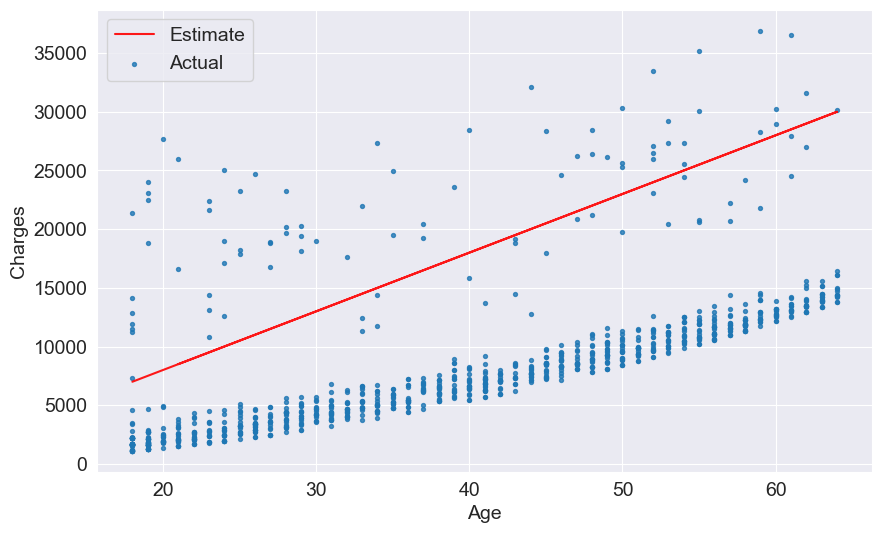

In [54]:
try_parameters(500,-2000)